/home.ufs/yw4236/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home.ufs/yw4236/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


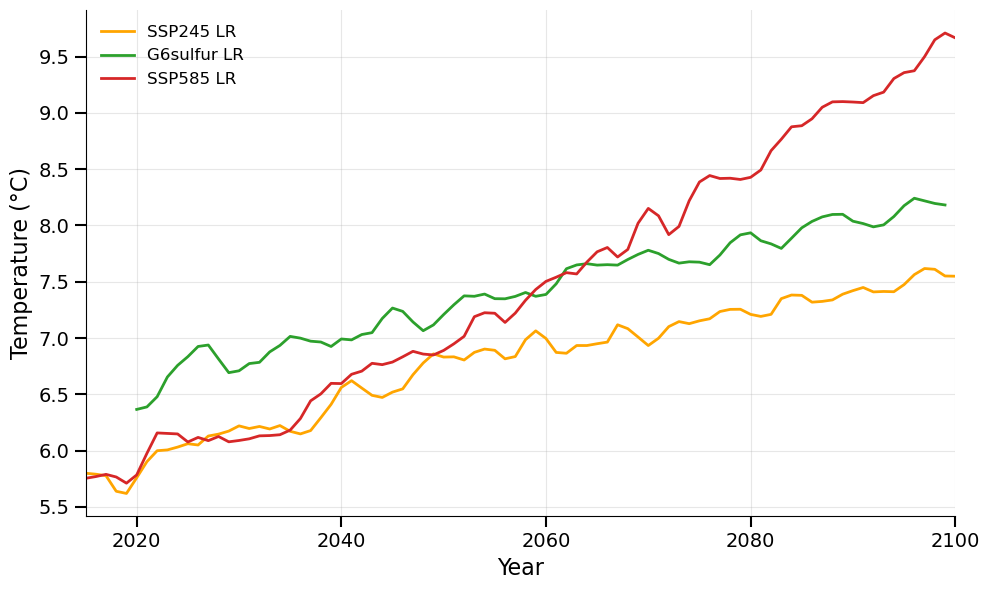

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from pathlib import Path

# Load data
data_dir = Path("../data")
figures_dir = Path("../Figures")
figures_dir.mkdir(exist_ok=True)

ds_ssp245 = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_ssp245_r1i1p1f1_2015_2100_allvars.nc")
ds_ssp585 = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")
ds_g6sulfur = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_g6sulfur_r1i1p1f1_2020_2099_allvars.nc")

# Variable
var_lr = 'tas_lr_interp'

def to_annual_mean(data, years):
    """Convert to annual averages"""
    df = pd.DataFrame({'year': years, 'value': data})
    annual = df.groupby('year')['value'].mean()
    return annual.index.values, annual.values

def smooth_data(data, window=3):
    """Apply rolling mean"""
    df = pd.Series(data)
    smoothed = df.rolling(window=window, center=True, min_periods=1).mean()
    return smoothed.values

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Colors and labels
colors = {
    'ssp245': 'orange',
    'g6sulfur': '#2ca02c',
    'ssp585': '#d62728'
}

labels = {
    'ssp245': 'SSP245 LR',
    'g6sulfur': 'G6sulfur LR',
    'ssp585': 'SSP585 LR'
}

scenarios = [
    ('ssp245', ds_ssp245),
    ('g6sulfur', ds_g6sulfur),
    ('ssp585', ds_ssp585)
]

for scenario_name, ds in scenarios:
    # Get LR temperature data
    tas_lr_data = ds[var_lr].values
    years = ds.time.dt.year.values
    
    # Calculate global mean
    global_mean_lr = np.mean(tas_lr_data, axis=(1, 2))
    
    # Convert to annual averages
    annual_years, annual_mean = to_annual_mean(global_mean_lr, years)
    
    # Apply smoothing
    smoothed = smooth_data(annual_mean, window=3)
    
    # Plot
    ax.plot(annual_years, smoothed, color=colors[scenario_name],
            linewidth=2, label=labels[scenario_name])

# Format
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Temperature (°C)', fontsize=16)
ax.set_xlim(2015, 2100)
ax.set_xticks(np.arange(2020, 2101, 20))
ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=14, length=8, width=1.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()


plt.show()

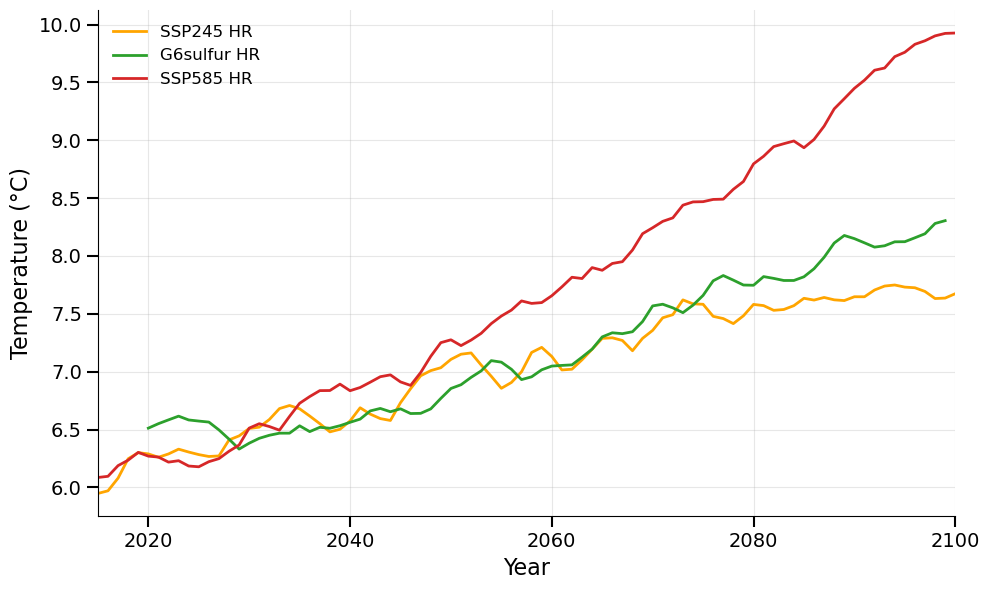

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from pathlib import Path

# Load data
data_dir = Path("../data")
figures_dir = Path("../Figures")
figures_dir.mkdir(exist_ok=True)

ds_ssp245 = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_ssp245_r1i1p1f1_2015_2100_allvars.nc")
ds_ssp585 = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")
ds_g6sulfur = xr.open_dataset(data_dir / "MPI-ESM1-2-HR-LR_g6sulfur_r1i1p1f1_2020_2099_allvars.nc")

# Variable
var_hr = 'tas_hr'

def to_annual_mean(data, years):
    """Convert to annual averages"""
    df = pd.DataFrame({'year': years, 'value': data})
    annual = df.groupby('year')['value'].mean()
    return annual.index.values, annual.values

def smooth_data(data, window=3):
    """Apply rolling mean"""
    df = pd.Series(data)
    smoothed = df.rolling(window=window, center=True, min_periods=1).mean()
    return smoothed.values

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Colors and labels
colors = {
    'ssp245': 'orange',
    'g6sulfur': '#2ca02c',
    'ssp585': '#d62728'
}

labels = {
    'ssp245': 'SSP245 HR',
    'g6sulfur': 'G6sulfur HR',
    'ssp585': 'SSP585 HR'
}

scenarios = [
    ('ssp245', ds_ssp245),
    ('g6sulfur', ds_g6sulfur),
    ('ssp585', ds_ssp585)
]

for scenario_name, ds in scenarios:
    # Get HR temperature data
    tas_hr_data = ds[var_hr].values
    years = ds.time.dt.year.values
    
    # Calculate global mean
    global_mean_hr = np.mean(tas_hr_data, axis=(1, 2))
    
    # Convert to annual averages
    annual_years, annual_mean = to_annual_mean(global_mean_hr, years)
    
    # Apply smoothing
    smoothed = smooth_data(annual_mean, window=3)
    
    # Plot
    ax.plot(annual_years, smoothed, color=colors[scenario_name],
            linewidth=2, label=labels[scenario_name])

# Format
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Temperature (°C)', fontsize=16)
ax.set_xlim(2015, 2100)
ax.set_xticks(np.arange(2020, 2101, 20))
ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=14, length=8, width=1.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()


plt.show()